In [280]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import t as t_dist




In [27]:
white = pd.read_csv('winequality-white.csv')
red = pd.read_csv('winequality-red.csv')

In [28]:
white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [29]:
white['type'] = 'white'
red['type'] = 'red'
white.head()
df = pd.concat([white,red], ignore_index=True)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white


In [31]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  type                  6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [32]:
df['quality'].describe()

count    6497.000000
mean        5.818378
std         0.873255
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         9.000000
Name: quality, dtype: float64

In [36]:
df.isna().sum()
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white


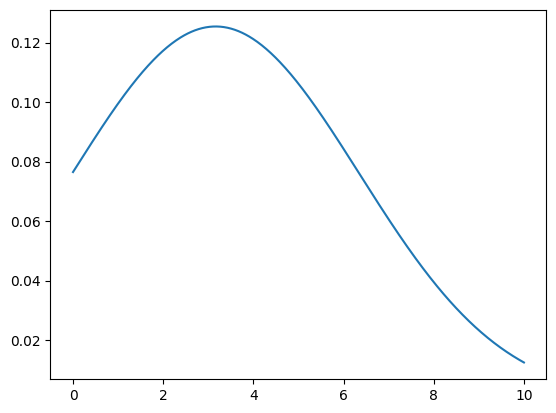

3.163635905702196 3.180334037198509


In [60]:
quality = df.groupby('quality').size().reset_index(name= 'count')
quality['count'] = quality['count']/2836
mu, sigma = norm.fit(quality)
x_ar = np.linspace(0, 10, 500)
y_ar = norm.pdf(x_ar, mu, sigma)
#plt.hist(quality)
plt.plot(x_ar, y_ar)
plt.show()
print(mu, sigma)

    type      mean  median        sd
0    red  5.636023     6.0  0.807569
1  white  5.877909     6.0  0.885639


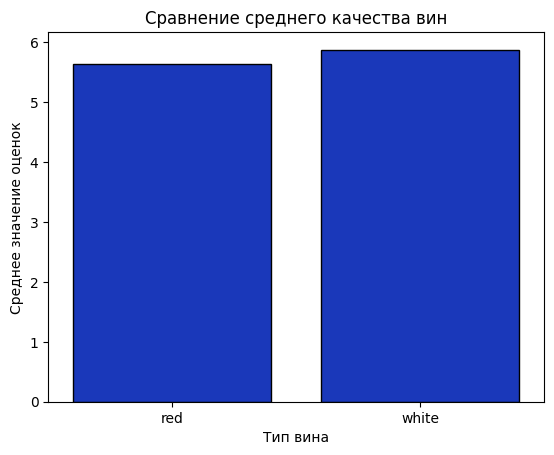

In [161]:
quality_min = df.groupby(['type'])['quality'].mean().reset_index(name = 'mean')
quality_med = df.groupby(['type'])['quality'].median().reset_index(name = 'median')
quality_var = df.groupby(['type'])['quality'].var().reset_index(name = 'var')
quality_des1 = pd.merge(quality_min,quality_med, on = 'type',  how = 'inner')
quality_des = pd.merge(quality_des1,quality_var, on = 'type',  how = 'inner' )
quality_des['var'] = np.sqrt(quality_des['var'])
quality_des = quality_des.rename(columns = {'var':'sd'})
sns.barplot(
    data = quality_des,
    x = 'type',
    y = 'mean',
    color="#0027D4FF",
    edgecolor= 'black'
)
plt.title('Сравнение среднего качества вин')
plt.ylabel("Среднее значение оценок")
plt.xlabel('Тип вина')
plt.savefig('quality_mean.pdf')
print(quality_des)
quality_des.to_csv('eda.csv')


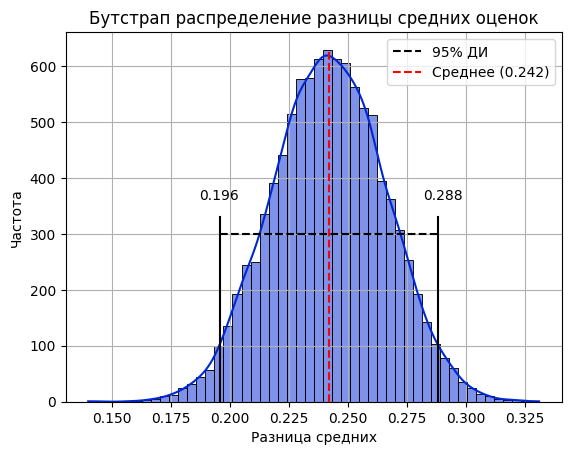

In [277]:
#бутстрап
white_quality_arr = df['quality'].loc[df['type'] == 'white']
red_quality_arr = df['quality'].loc[df['type'] == 'red']
white_size = len(white_quality_arr)
red_size = len(red_quality_arr)
count_samples_bootstrap = 10000
delta_arr = np.zeros(count_samples_bootstrap)
for i in range(count_samples_bootstrap):
    white_test = np.random.choice(white_quality_arr, white_size, replace=True)
    red_test = np.random.choice(red_quality_arr, red_size, replace=True)
    delta = abs(np.mean(white_test) - np.mean(red_test))
    delta_arr[i] = delta 
ci_low, ci_high = np.percentile(delta_arr, [2.5, 97.5])
sns.histplot(delta_arr, bins=50,kde=True,  color="#0027D4FF" )
plt.xlabel("Разница средних")
plt.ylabel('Частота')
plt.title("Бутстрап распределение разницы средних оценок")
plt.axvline(x = ci_low, ymin = 0, ymax = 0.5, color = 'black')
plt.axvline(x = ci_high, ymin = 0, ymax = 0.5, color = 'black')
plt.hlines(y = 300, xmin=ci_low, xmax=ci_high, linestyle="--" , label='95% ДИ', color = 'black')
plt.text(0.187, 360, round(ci_low, 3))
plt.text(0.282, 360, round(ci_high, 3))
plt.axvline(x = np.mean(delta_arr), ymin = 0, ymax= 0.95, linestyle="--", color = 'red', label = f'Среднее ({round(np.mean(delta_arr), 3)})')
plt.legend()
plt.grid(True)
plt.savefig('deltamean_bootstrap.pdf')




In [177]:
#тест Уэлча
def uelch(x1arr, x2arr):
    def formula(x1, x2, sigma1, sigma2, n1, n2):
        result = (x1 - x2)/(np.sqrt(sigma1/n1 + sigma2/n2))
        return result
    t_value = formula(np.mean(x1arr), np.mean(x2arr), np.var(x1arr, ddof=1), np.var(x2arr, ddof=1), len(x1arr), len(x2arr))
    s1, s2 = np.var(x1arr, ddof=1), np.var(x2arr, ddof=1)
    n_1, n_2 = len(x1arr), len(x2arr) 
    df = (s1/n_1 + s2/n_2)**2/((s1/n_1)**2/(n_1-1) + (s2/n_2)**2/(n_2-1))
    p_value = 2*(t_dist.sf(abs(t_value), df))
    return t_value, p_value
t_stat, p_value = uelch(white_quality_arr, red_quality_arr)
print(t_stat, p_value)


10.149363059143164 8.168348870049682e-24


In [ ]:
#проверка функции для Уэлча 
from scipy.stats import ttest_ind

t_stat, p_val = ttest_ind(white_quality_arr, red_quality_arr, equal_var=False)
print("scipy t =", t_stat, "p =", p_val)


scipy t = 10.149363059143164 p = 8.168348870049682e-24
0    6
1    6
2    6
3    6
4    6
Name: quality, dtype: int64


In [261]:
#перестановочный тест 
import random
white_and_red = pd.concat([white_quality_arr, red_quality_arr], ignore_index=True)
count_samples_reshafle = 10000
delta_reshafle = np.zeros(count_samples_reshafle)
def perm_fun(x, nA, nB):
    n = nA + nB
    idx_B = set(random.sample(range(n), nB))
    idx_A = set(range(n)) - idx_B
    return (x.iloc[list(idx_B)].mean() - x.iloc[list(idx_A)].mean())
for i in range(count_samples_reshafle): 
    delta_reshafle[i] = perm_fun(white_and_red, len(white_quality_arr), len(red_quality_arr))
print(delta_reshafle)



[ 0.00200258  0.0185937   0.00366169 ...  0.0335257   0.00200258
 -0.02454321]


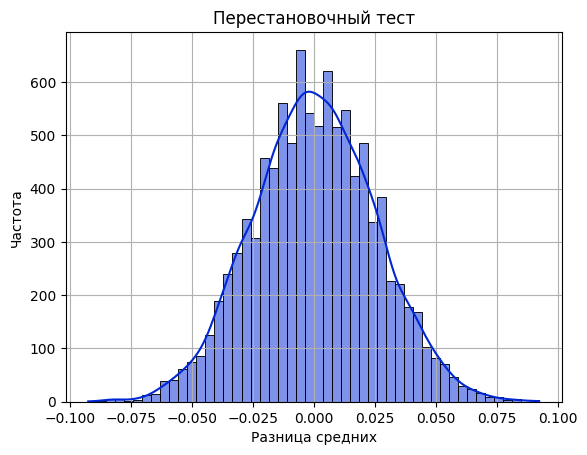

9.999000099990002e-05


In [282]:
sns.histplot(delta_reshafle, bins=50,kde=True,  color="#0027D4FF")
plt.grid(True)
plt.xlabel("Разница средних")
plt.ylabel('Частота')
plt.title('Перестановочный тест')
plt.savefig('reshafle.pdf')
plt.show()
extreme_count = 0
delta_mean_obs = abs(white_quality_arr.mean() - red_quality_arr.mean())
for i in delta_reshafle: 
    if abs(i) >= delta_mean_obs:
        extreme_count = extreme_count + 1
p_reshafle = (extreme_count +1 ) / (count_samples_reshafle+1 )
print(p_reshafle)

In [ ]:
#линейная регрессия quality∼alcohol + sulphates + residual_sugar +density + type
def binary_func_type(x):
    if x == 'white':
        return 1
    else:
        return 0
df['binary_type'] = df['type'].apply(binary_func_type)
df_regres = df.loc[:, ['alcohol', 'sulphates', 'residual sugar', 'density', 'binary_type']]
quality_regres = df['quality']
def lstsq_ne(a, b, i):
    at_a = a.T @ a  
    at_b = a.T @ b  
    x=(np.linalg.inv(at_a))@ at_b
    cost=(np.linalg.norm(a @ x-b))**2
    sigma2 = cost/(len(b) - a.shape[1])
    var=np.linalg.inv(at_a)
    se = np.sqrt(sigma2*var[i][i])
    return(x, cost, var, se)
x, cost, var, se = lstsq_ne(df_regres, quality_regres, 0)
print('MSE=',cost/len(quality_regres), 'b =', x, 'SE(alcohol)=', se)
#ДИ 95% для коэффициента при alcohol (Аналитический)
from scipy.stats import norm
alpha = 0.05
z_crit = norm.ppf(1 - alpha/2)
ci_regres_high = x[0]+z_crit*se
ci_regres_low = x[0]-z_crit*se
ci_regres = np.array([ci_regres_low,ci_regres_high])
print('ДИ(95%)=',ci_regres)
print(x[0])
#ДИ 95% для коэффициента при alcohol (Бутстрап)
alcohol_boot = np.zeros(count_samples_bootstrap)
for i in range(count_samples_bootstrap):
    idx = np.random.choice(len(df_regres), size = len(df_regres), replace=True)
    df_regres_boot = df_regres.iloc[idx]
    quality_regres_boot = quality_regres.iloc[idx]
    xboot, costboot, varboot, seboot = lstsq_ne(df_regres_boot, quality_regres_boot, 0)
    alcohol_boot[i] = xboot[0]

MSE= 0.5878231806411699 b = [0.35545502 0.70860178 0.0209154  1.41601605 0.2522163 ] SE(alcohol)= 0.008588368140648017
ДИ(95%)= [0.33862212 0.37228791]
0.35545501550480196


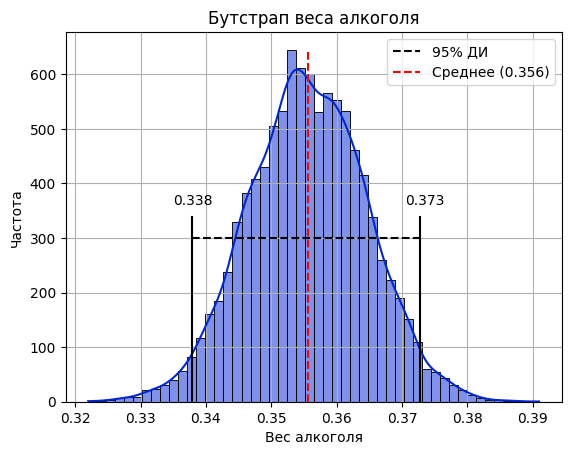

In [279]:
ci_low1, ci_high1 = np.percentile(alcohol_boot, [2.5, 97.5])
sns.histplot(alcohol_boot, bins=50,kde=True,  color="#0027D4FF" )
plt.axvline(x = ci_low1, ymin = 0, ymax = 0.5, color = 'black')
plt.axvline(x = ci_high1, ymin = 0, ymax = 0.5, color = 'black')
plt.hlines(y = 300, xmin=ci_low1, xmax=ci_high1, linestyle="--" , label='95% ДИ', color = 'black')
plt.axvline(x = np.mean(alcohol_boot), ymin = 0, ymax= 0.95, linestyle="--", color = 'red', label = f'Среднее ({round(np.mean(alcohol_boot), 3)})')
plt.grid(True)
plt.xlabel("Вес алкоголя")
plt.ylabel('Частота')
plt.text(0.335, 360, round(ci_low1, 3))
plt.text(0.3705, 360, round(ci_high1, 3))
plt.title('Бутстрап веса алкоголя')
plt.legend()
plt.savefig('alcohol.pdf')
plt.show()
